In [2]:
%pip install scipy

# to handle datasets
import pandas as pd
import numpy as np

# for plotting
import matplotlib.pyplot as plt
import seaborn as sns

# for the yeo-johnson transformation
import scipy.stats as stats

# to display all the columns of the dataframe in the notebook
pd.pandas.set_option('display.max_columns', None)

Note: you may need to restart the kernel to use updated packages.


In [46]:
# load dataset
data = pd.read_csv(r"D:\Datasets & Files\cred.csv")

# rows and columns of the data
print(data.shape)

# visualise the dataset
data.head()

(29167, 28)


,Credit Line,Initial Score,Recommended Line,AgentID,Number Inquiries,Worst Rating Des,Year Last Check,Major Derog Num,Satisfactory Num,Year at Address,Bank Reference,Fin Co Ref,Dept Store Ref,Bank Dda Ref,Bank Save Ref,Credit Card Ref,Region,Avg Monthly Balance,Total Amount Purchased,Total Service Charge Revenue,Profit,Delinquent Lev 1,Delinquent Lev 2,Delinquent Lev 3,Amount Lost,age,Residential Status,Status
0,500,463,500,A24,98.0,3 satisfactory ratings,1.0,0.0,3.0,10.0,1.0,NaN,NaN,1.0,1.0,1.0,Eleven,18,444,1,9.88,0,0,0,0.0,34.0,Own Home,OK
1,2500,321,1,A76,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Eleven,25,285,2,7.70,1,0,0,0.0,NaN,NaN,OK
2,500,331,500,A66,98.0,1 satisfactory rating,1.0,0.0,1.0,23.0,1.0,NaN,NaN,1.0,1.0,1.0,Eleven,123,1471,3,32.42,0,0,0,0.0,25.0,Other,OK
3,1000,370,1,A79,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Eleven,31,85,6,7.70,2,1,0,0.0,46.0,NaN,OK
4,1000,399,500,A29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Eleven,21,196,0,3.92,0,0,0,0.0,65.0,NaN,OK


In [4]:
data['AgentID'].nunique()

100

In [47]:
# drop id, it is just a number given to identify each house
data.drop('AgentID', axis=1, inplace=True)

In [48]:
data['Status'] = data['Status'].replace('Bad Debt', 'Closed')

In [7]:
data.head()

,Credit Line,Initial Score,Recommended Line,Number Inquiries,Worst Rating Des,Year Last Check,Major Derog Num,Satisfactory Num,Year at Address,Bank Reference,Fin Co Ref,Dept Store Ref,Bank Dda Ref,Bank Save Ref,Credit Card Ref,Region,Avg Monthly Balance,Total Amount Purchased,Total Service Charge Revenue,Profit,Delinquent Lev 1,Delinquent Lev 2,Delinquent Lev 3,Amount Lost,age,Residential Status,Status
0,500,463,500,98.0,3 satisfactory ratings,1.0,0.0,3.0,10.0,1.0,NaN,NaN,1.0,1.0,1.0,Eleven,18,444,1,9.88,0,0,0,0.0,34.0,Own Home,OK
1,2500,321,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Eleven,25,285,2,7.70,1,0,0,0.0,NaN,NaN,OK
2,500,331,500,98.0,1 satisfactory rating,1.0,0.0,1.0,23.0,1.0,NaN,NaN,1.0,1.0,1.0,Eleven,123,1471,3,32.42,0,0,0,0.0,25.0,Other,OK
3,1000,370,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Eleven,31,85,6,7.70,2,1,0,0.0,46.0,NaN,OK
4,1000,399,500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Eleven,21,196,0,3.92,0,0,0,0.0,65.0,NaN,OK


In [10]:
What are the categories in Status column?
data['Status'].unique()



Object `column` not found.


array(['OK', 'Closed'], dtype=object)

In [49]:
cat_vars = [var for var in data.columns if data[var].dtype == 'O']
len(cat_vars)

4

In [52]:
cat_vars

['Worst Rating Des', 'Region', 'Residential Status']

In [51]:
cat_vars = [var for var in cat_vars if var != 'Status']

In [53]:
num_vars = [
    var for var in data.columns if var not in cat_vars 
]

# number of numerical variables
len(num_vars)

24

In [16]:
num_vars

['Credit Line',
 'Initial Score',
 'Recommended Line',
 'Number Inquiries',
 'Year Last Check',
 'Major Derog Num',
 'Satisfactory Num',
 'Year at Address',
 'Bank Reference',
 'Fin Co Ref',
 'Dept Store Ref',
 'Bank Dda Ref',
 'Bank Save Ref',
 'Credit Card Ref',
 'Avg Monthly Balance',
 'Total Amount Purchased',
 'Total Service Charge Revenue',
 'Profit',
 'Delinquent Lev 1',
 'Delinquent Lev 2',
 'Delinquent Lev 3',
 'Amount Lost',
 'age']

In [54]:
# make a list of the variables that contain missing values
vars_with_na = [var for var in data.columns if data[var].isnull().sum() > 0]

# determine percentage of missing values (expressed as decimals)
# and display the result ordered by % of missin data

data[vars_with_na].isnull().mean().sort_values(ascending=False)

Fin Co Ref            0.751020
Satisfactory Num      0.621661
Major Derog Num       0.621661
Bank Save Ref         0.583776
Year Last Check       0.577365
Number Inquiries      0.577159
Worst Rating Des      0.572393
Credit Card Ref       0.528371
Dept Store Ref        0.507834
Bank Dda Ref          0.490760
Year at Address       0.434635
Residential Status    0.408818
Bank Reference        0.403230
age                   0.021325
dtype: float64

In [55]:
# Remove columns with more than 40% missing values
vars_to_drop = [
    var for var in data.columns
    if data[var].isnull().mean() > 0.4
]


In [56]:
#  let's male a list of discrete variables
discrete_vars = [var for var in num_vars if len(
    data[var].unique()) < 20 ]


print('Number of discrete variables: ', len(discrete_vars))

Number of discrete variables:  12


In [57]:
# make list of continuous variables
cont_vars = [var for var in num_vars if var not in discrete_vars and var not in vars_to_drop]

print('Number of continuous variables: ', len(cont_vars))
data[cont_vars].head()

Number of continuous variables:  9


,Credit Line,Initial Score,Recommended Line,Avg Monthly Balance,Total Amount Purchased,Total Service Charge Revenue,Profit,Amount Lost,age
0,500,463,500,18,444,1,9.88,0.0,34.0
1,2500,321,1,25,285,2,7.70,0.0,NaN
2,500,331,500,123,1471,3,32.42,0.0,25.0
3,1000,370,1,31,85,6,7.70,0.0,46.0
4,1000,399,500,21,196,0,3.92,0.0,65.0


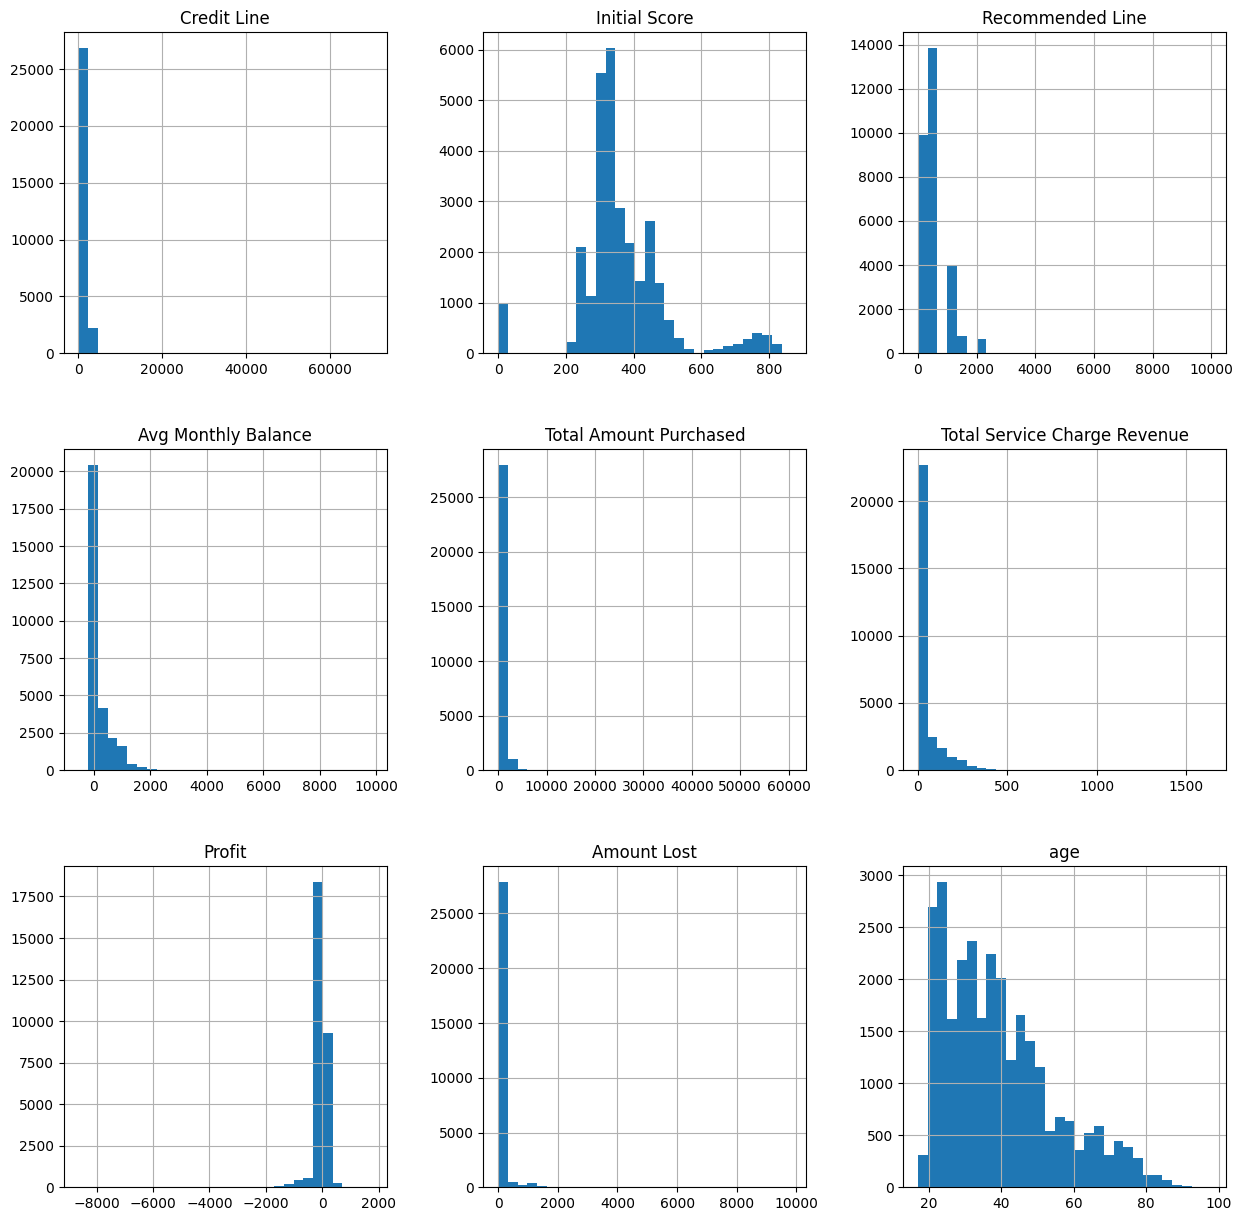

In [33]:

data[cont_vars].hist(bins=30, figsize=(15,15))
plt.show()

In [34]:
skewed = [
    'Amount Lost', 'Profit', 'Total Service Charge Revenue',
    'Total Amount Purchased', 'Avg Monthly Balance', 'Credit Line',
    'Recommended Line'
]

In [58]:
cont_vars = [var for var in cont_vars if var not in vars_to_drop]


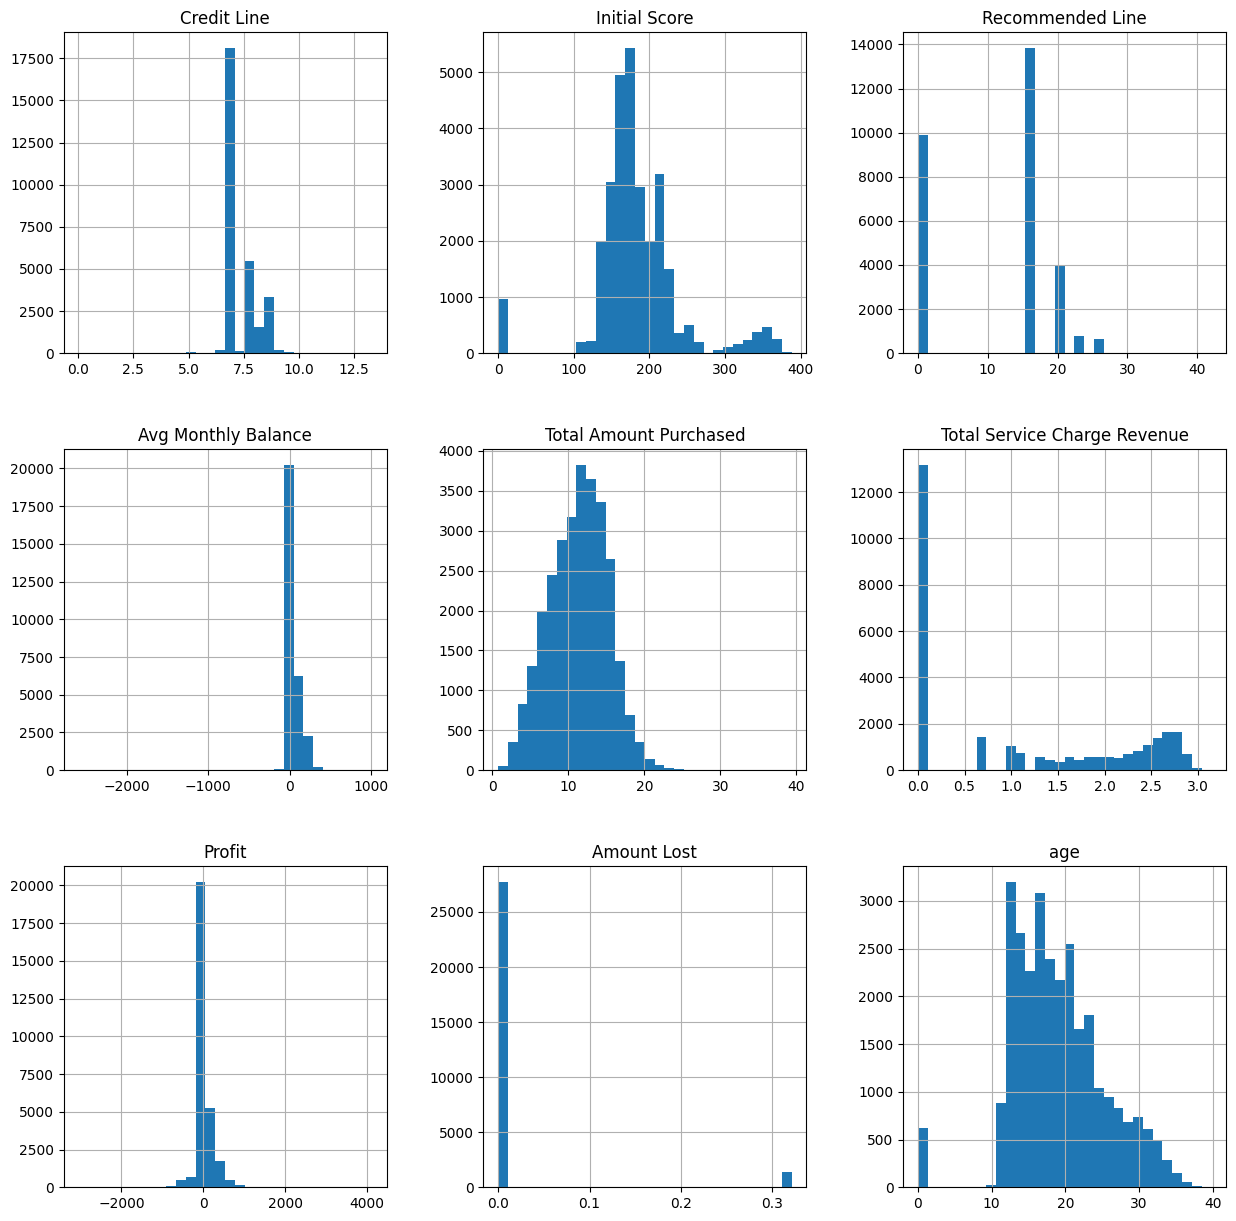

In [59]:
# Let's go ahead and analyse the distributions of the variables
# after applying a yeo-johnson transformation

# temporary copy of the data
tmp = data[[var for var in data.columns if var not in vars_to_drop]]
tmp = tmp.fillna(0)
for var in cont_vars:

    # transform the variable - yeo-johsnon
    tmp[var], param = stats.yeojohnson(tmp[var])

    
# plot the histograms of the transformed variables
tmp[cont_vars].hist(bins=30, figsize=(15,15))
plt.show()

In [60]:
data = data[[var for var in data.columns if var not in vars_to_drop]]

In [65]:
# let's visualise the values of the categorical variables
cat_vars= [var for var in cat_vars if var not in vars_to_drop]
data[cat_vars].head()

,Region
0,Eleven
1,Eleven
2,Eleven
3,Eleven
4,Eleven


In [67]:
data.head()

,Credit Line,Initial Score,Recommended Line,Region,Avg Monthly Balance,Total Amount Purchased,Total Service Charge Revenue,Profit,Delinquent Lev 1,Delinquent Lev 2,Delinquent Lev 3,Amount Lost,age,Status
0,500,463,500,Eleven,18,444,1,9.88,0,0,0,0.0,34.0,OK
1,2500,321,1,Eleven,25,285,2,7.70,1,0,0,0.0,NaN,OK
2,500,331,500,Eleven,123,1471,3,32.42,0,0,0,0.0,25.0,OK
3,1000,370,1,Eleven,31,85,6,7.70,2,1,0,0.0,46.0,OK
4,1000,399,500,Eleven,21,196,0,3.92,0,0,0,0.0,65.0,OK


In [ ]:
data[cat_vars].nunique()

Region    13
dtype: int64

Feature Engineering

In [69]:
import scipy.stats as stats

# to divide train and test set
from sklearn.model_selection import train_test_split

# feature scaling
from sklearn.preprocessing import MinMaxScaler

# to save the trained scaler class
import joblib

# to visualise al the columns in the dataframe
pd.pandas.set_option('display.max_columns', None)

In [70]:
X_train, X_test, y_train, y_test = train_test_split(
    data.drop(['Status'], axis=1), # predictive variables
    data['Status'], # target
    test_size=0.1, # portion of dataset to allocate to test set
    random_state=0, # we are setting the seed here
)

X_train.shape, X_test.shape

((26250, 13), (2917, 13))

In [72]:
num_vars = X_train.select_dtypes(include=['number']).columns.tolist()

In [73]:
num_vars

['Credit Line',
 'Initial Score',
 'Recommended Line',
 'Avg Monthly Balance',
 'Total Amount Purchased',
 'Total Service Charge Revenue',
 'Profit',
 'Delinquent Lev 1',
 'Delinquent Lev 2',
 'Delinquent Lev 3',
 'Amount Lost',
 'age']

In [74]:
cat_vars = X_train.select_dtypes(include=['object', 'category']).columns.tolist()
print(cat_vars)

['Region']


In [75]:
# make a list with the numerical variables that contain missing values
vars_with_na = [
    var for var in num_vars
    if X_train[var].isnull().sum() > 0
]

# print percentage of missing values per variable
X_train[vars_with_na].isnull().mean()

age    0.021371
dtype: float64

In [76]:
# replace missing values as we described above

for var in vars_with_na:

    # calculate the mean using the train set
    mean_val = X_train[var].mean()
    
    print(var, mean_val)

    # add binary missing indicator (in train and test)
    X_train[var + '_na'] = np.where(X_train[var].isnull(), 1, 0)
    X_test[var + '_na'] = np.where(X_test[var].isnull(), 1, 0)

    # replace missing values by the mean
    # (in train and test)
    X_train[var].fillna(mean_val, inplace=True)
    X_test[var].fillna(mean_val, inplace=True)

# check that we have no more missing values in the engineered variables
X_train[vars_with_na].isnull().sum()

age 39.23539258048192


C:\Users\subhol\AppData\Local\Temp\ipykernel_37652\484834183.py:16: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X_train[var].fillna(mean_val, inplace=True)
C:\Users\subhol\AppData\Local\Temp\ipykernel_37652\484834183.py:17: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For exampl

age    0
dtype: int64